In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# figure_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/figures_robustreg_behav_hc2"
# result_dir = "/home/xin/Dropbox/BrainImaging_ML/multidimensional_age_prediction/result_robustreg_behav_hc2"

figure_dir = "figures_robustreg_behav_hc2"
result_dir = "result_robustreg_behav_hc2"

out_dir = "out03_age_prediction"

cluster_data = pd.read_csv(result_dir+'/out02_coefs_cluster_R_gmm.csv', index_col = 0)
# behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col = 0)

cluster_data.columns.values[[3,5,6]] = [ 'age$^2$', 'age*gender', 'age*gender$^2$']

In [42]:
pd.set_option('display.max_rows', 500)
cluster_data

,feature,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,rsquare_thresh,cluster_gmm_eve3,cluster_gmm_eve2,cluster_gmm_behav_vve2
1,ABF_Accuracy,behav,0.181908,0.005024,-1.735781,0.280883,-0.009891,0.068020,False,NaN,NaN,NaN
2,ATT_Accuracy,behav,0.308830,0.007711,0.924346,-0.087803,0.002047,0.188576,True,NaN,NaN,1.0
3,WM_Accuracy,behav,0.325517,0.008907,-1.356528,0.204056,-0.007062,0.146375,True,NaN,NaN,1.0
4,VMEM_Accuracy,behav,0.155324,0.004781,-0.593761,0.083459,-0.003092,0.040648,False,NaN,NaN,NaN
5,FMEM_Accuracy,behav,0.402176,0.011475,-1.426604,0.224499,-0.008263,0.128487,True,NaN,NaN,1.0
6,SMEM_Accuracy,behav,0.102200,0.002266,0.636339,-0.075789,0.002458,0.077588,False,NaN,NaN,NaN
7,LAN_Accuracy,behav,0.458264,0.012688,-0.648525,0.124680,-0.004609,0.348552,True,NaN,NaN,1.0
8,NVR_Accuracy,behav,0.364174,0.010483,-0.040834,0.029596,-0.001291,0.148197,True,NaN,NaN,1.0
9,SPA_Accuracy,behav,0.622627,0.020388,-0.089805,0.051375,-0.002187,0.239967,True,NaN,NaN,1.0
10,EID_Accuracy,behav,0.020068,0.000331,0.711017,-0.112703,0.003969,0.026109,False,NaN,NaN,NaN


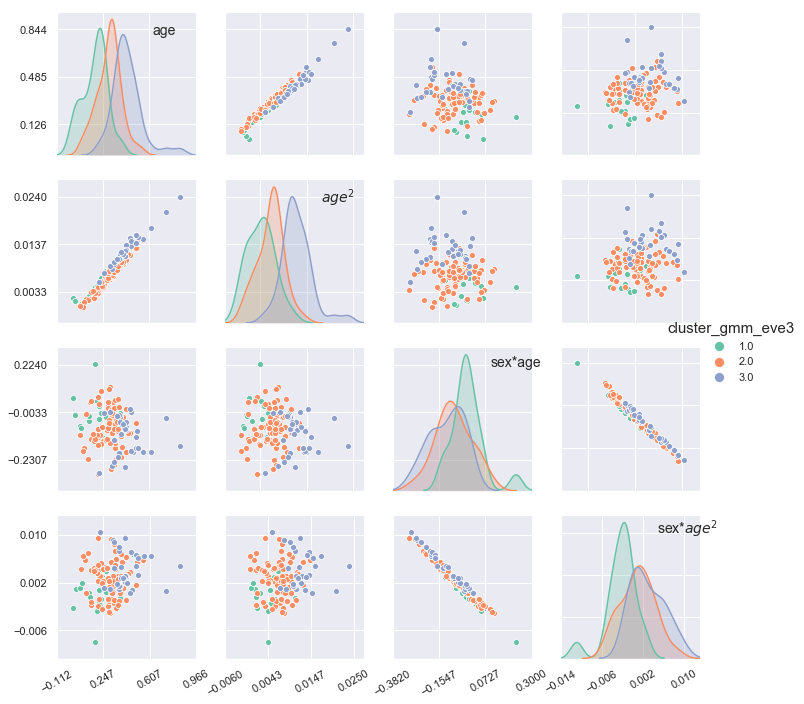

In [43]:
# make pair plots:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1)
import numpy as np

cluster_col_index = 'cluster_gmm_eve3'
plot_data = cluster_data.loc[cluster_data[cluster_col_index]<10, :]

columns = ['age', 'age$^2$', 'age*gender', 'age*gender$^2$']
# change cluster index
# coefs_data.replace({'cluster': {1: 11, 2: 12, 3:13, 4: 14}}, inplace = True)
# coefs_data.replace({'cluster': {12: 1, 14: 2, 11: 3, 13: 4}}, inplace = True)
# column_label = ['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare']

# plt.figure()

def plot_cluster(plot_data, label_var):

    g = sns.pairplot(plot_data, kind="scatter", hue=label_var,
                     vars=['age', 'age$^2$', 'age*gender', 'age*gender$^2$'], palette="Set2")

    text_size = 14
    g.axes[0, 0].text(max(plot_data[columns[0]])*.75, 
                      max(plot_data[columns[0]])*.95, 
                      'age', fontsize = text_size)
    g.axes[1, 1].text(max(plot_data[columns[1]])*.75, 
                      max(plot_data[columns[1]])*.95, 
                      '$age^2$', fontsize = text_size)
    g.axes[2, 2].text(max(plot_data[columns[2]])*.45, 
                      max(plot_data[columns[2]])*.95, 
                      'sex*age', fontsize = text_size)
    g.axes[3, 3].text(max(plot_data[columns[3]])*.45, 
                      max(plot_data[columns[3]])*.95, 
                      'sex*$age^2$', fontsize = text_size)


    num_vars = len(columns)

    for idx in range(num_vars):
        g.axes[num_vars-1, idx].set_xlabel('')
        g.axes[idx, 0].set_ylabel('')


    for idx1 in range(num_vars):
        for idx2 in range(num_vars):
            offset1 = (max(plot_data.loc[:, columns[idx1]]) - 
                       min(plot_data.loc[:, columns[idx1]]))*.15
            offset2 = (max(plot_data.loc[:, columns[idx2]]) - 
                       min(plot_data.loc[:, columns[idx2]]))*.15

            limit_idx1 = [min(plot_data.loc[:, columns[idx1]])-offset1, 
                          max(plot_data.loc[:, columns[idx1]])+offset1]

            limit_idx2 = [min(plot_data.loc[:, columns[idx2]])-offset2,
                          max(plot_data.loc[:, columns[idx2]])+offset2]

            g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
            #g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))
            g.axes[idx1, idx2].set_yticks(np.round(np.linspace(round(limit_idx1[0]-offset1,3), 
                                                               round(limit_idx1[1]-offset1,3), num=4), 4))

            g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
            #g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))
            g.axes[idx1, idx2].set_xticks(np.round(np.linspace(round(limit_idx2[0]-offset1,3), 
                                                               round(limit_idx2[1]-offset1,3), num=4), 4))
            if idx1==num_vars-1:
                #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
                plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)


    # ticks = g.axes[3][1].get_xticks()
    # xlabels = ['{:1.1e}'.format(x) for x in ticks]
    # g.axes[3][1].set_xticklabels(xlabels)
    # g.axes[1][3].set_yticklabels(xlabels)

    plt.setp(g._legend.get_title(), fontsize=15)


    for lh in g._legend.legendHandles: 
        lh.set_alpha(1)
        lh._sizes = [100] 

    plt.show()
    
plot_cluster(plot_data, cluster_col_index)


In [44]:
# plot_data = coefs_data.loc[coefs_data['cluster_gmm']<10, :]
# plot_cluster(plot_data, 'cluster_gmm')

In [45]:
# plot_data = coefs_data.loc[coefs_data['cluster_gmm'].isin([1,3,4,5,6]), :]
# plot_cluster(plot_data, 'cluster_gmm')

In [46]:
coefs_summary = cluster_data.groupby(cluster_col_index).mean()
print(coefs_summary.columns)
# coefs_summary.columns = ['R$^2$', 'age', 'age$^2$', 'gender', 'gender*age', 'gender*age$^2$',\
#                          'Peak age(M)','Peak age(F)']
coefs_summary

Index(['age', 'age$^2$', 'gender', 'age*gender', 'age*gender$^2$', 'Rsquare',
       'rsquare_thresh', 'cluster_gmm_eve2', 'cluster_gmm_behav_vve2'],
      dtype='object')


,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,rsquare_thresh,cluster_gmm_eve2,cluster_gmm_behav_vve2
cluster_gmm_eve3,,,,,,,,,
1.0,0.186843,0.004550,0.251853,-0.012360,-0.000318,0.167444,True,1.117647,1.058824
2.0,0.296457,0.006713,0.669507,-0.079913,0.002506,0.316321,True,1.111111,1.000000
3.0,0.435552,0.012549,0.783118,-0.114504,0.004263,0.195583,True,1.842105,1.000000


In [47]:
print(cluster_data.loc[cluster_data[cluster_col_index]==1,:].shape)
cluster_data.loc[cluster_data[cluster_col_index]==1,:].sort_values(by=['modality', 'Rsquare'], 
                                                                   ascending=[True, False])

(17, 12)


,feature,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,rsquare_thresh,cluster_gmm_eve3,cluster_gmm_eve2,cluster_gmm_behav_vve2
61,Left Cingulum,gmv,0.215848,0.004856,0.731316,-0.037418,0.000674,0.367502,True,1.0,1.0,1.0
120,Cerebellum_Crus2_R,gmv,0.143145,0.001502,0.247913,-0.022441,-0.000432,0.281077,True,1.0,1.0,1.0
125,Cerebellum_6_L,gmv,0.239588,0.005798,1.183802,-0.123169,0.002844,0.192798,True,1.0,1.0,1.0
119,Cerebellum_Crus2_L,gmv,0.079905,0.000682,0.533703,-0.079165,0.001865,0.191886,True,1.0,1.0,1.0
118,Cerebellum_Crus1_R,gmv,0.140820,0.002427,0.519313,-0.044246,0.000318,0.181251,True,1.0,1.0,1.0
138,Vermis_6,gmv,0.270356,0.006864,1.170713,-0.137406,0.003889,0.177242,True,1.0,1.0,1.0
128,Cerebellum_7b_R,gmv,0.199808,0.004491,-0.198924,0.050106,-0.002714,0.172506,True,1.0,1.0,1.0
117,Cerebellum_Crus1_L,gmv,0.069776,0.000419,0.635318,-0.069542,0.001139,0.164314,True,1.0,1.0,1.0
81,Left Fusiform,gmv,0.216519,0.005126,0.114558,0.024219,-0.001499,0.159495,True,1.0,1.0,1.0
67,Left Amygdala,gmv,0.219576,0.005043,-0.130187,0.023519,-0.001533,0.138514,True,1.0,1.0,1.0


In [48]:
pd.set_option('display.max_rows', 500)
print(cluster_data.loc[cluster_data[cluster_col_index]==2,:].shape)
cluster2_data = cluster_data.loc[cluster_data[cluster_col_index]==2,:].sort_values(by=['modality', 'Rsquare'], 
                                                                   ascending=[True, False])

cluster2_data.to_csv(out_dir+'/out03_coefs_cluster_2_gmm.csv')
cluster2_data

(81, 12)


,feature,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,rsquare_thresh,cluster_gmm_eve3,cluster_gmm_eve2,cluster_gmm_behav_vve2
33,Left Middle Frontal,gmv,0.258319,0.004928,0.708212,-0.075395,0.002368,0.509590,True,2.0,1.0,1.0
39,Left Inferior Frontal,gmv,0.316557,0.006518,0.921132,-0.102609,0.002912,0.505827,True,2.0,1.0,1.0
107,Left Superior Temporal,gmv,0.355211,0.008097,0.506004,-0.050612,0.001697,0.480414,True,2.0,1.0,1.0
108,Right Superior Temporal,gmv,0.504162,0.012905,0.526749,-0.054988,0.001510,0.469682,True,2.0,1.0,1.0
42,Right Inferior Frontal Orbital,gmv,0.402035,0.009275,0.197774,-0.028465,0.001058,0.464021,True,2.0,1.0,1.0
35,Left Middle Frontal Orbital,gmv,0.395095,0.009632,1.306111,-0.170081,0.005372,0.452327,True,2.0,1.0,1.0
31,Left Superior Frontal Orbital,gmv,0.424109,0.010257,1.449996,-0.195111,0.006199,0.443864,True,2.0,1.0,1.0
92,Right Angular,gmv,0.558060,0.014584,1.507875,-0.189743,0.005718,0.441256,True,2.0,1.0,1.0
41,Left Inferior Frontal Orbital,gmv,0.304212,0.006051,0.424109,-0.058935,0.002070,0.436005,True,2.0,1.0,1.0
34,Right Middle Frontal,gmv,0.365043,0.008709,0.800616,-0.095818,0.003108,0.434894,True,2.0,1.0,1.0


In [49]:
print(cluster_data.loc[cluster_data[cluster_col_index]==3,:].shape)
cluster3_data = cluster_data.loc[cluster_data[cluster_col_index]==3,:].sort_values(by=['modality', 'Rsquare'], 
                                                                   ascending=[True, False])

cluster3_data.to_csv(out_dir+'/out03_coefs_cluster_3_gmm.csv')
cluster3_data

(38, 12)


,feature,modality,age,age$^2$,gender,age*gender,age*gender$^2$,Rsquare,rsquare_thresh,cluster_gmm_eve3,cluster_gmm_eve2,cluster_gmm_behav_vve2
94,Right Precuneus,gmv,0.559733,0.014665,1.628548,-0.195798,0.006420,0.454777,True,3.0,1.0,1.0
102,Right Pallidum,gmv,0.843980,0.023967,1.307636,-0.165407,0.004764,0.434257,True,3.0,1.0,1.0
101,Left Pallidum,gmv,0.736307,0.020744,0.250156,-0.030589,0.000551,0.405960,True,3.0,1.0,1.0
93,Left Precuneus,gmv,0.617294,0.017257,1.548556,-0.193502,0.006526,0.403533,True,3.0,1.0,1.0
86,Right Superior Parietal,gmv,0.321006,0.008269,1.726927,-0.261138,0.009197,0.113336,True,3.0,2.0,1.0
178,Cingulum.(cingulate.gyrus).L,label_fa,0.499127,0.013796,1.167603,-0.175644,0.006558,0.347379,True,3.0,2.0,1.0
159,Anterior.limb.of.internal.capsule.R,label_fa,0.513163,0.014301,0.701831,-0.091964,0.003276,0.301077,True,3.0,2.0,1.0
177,Cingulum.(cingulate.gyrus).R,label_fa,0.413813,0.011050,0.652070,-0.084304,0.003136,0.300761,True,3.0,2.0,1.0
160,Anterior.limb.of.internal.capsule.L,label_fa,0.466688,0.013272,-0.023834,-0.000629,0.000682,0.265069,True,3.0,2.0,1.0
183,Superior.longitudinal.fasciculus.R,label_fa,0.378168,0.010618,0.174078,-0.025461,0.001456,0.193152,True,3.0,2.0,1.0


## Precuneus

The precuneus is the portion of the superior parietal lobule on the medial surface of each brain hemisphere. It is located in front of the cuneus (the upper portion of the occipital lobe). The precuneus is bounded in front by the marginal branch of the cingulate sulcus, at the rear by the parietooccipital sulcus, and underneath by the subparietal sulcus. It is involved with episodic memory, visuospatial processing, reflections upon self, and aspects of consciousness.

## Pallidum

The globus pallidus is a structure in the brain involved in the regulation of voluntary movement.[7] It is part of the basal ganglia, which, among many other things, regulate movements that occur on the subconscious level.

## Vermis

Lesions to the vermis commonly give rise to clinical depression, inappropriate emotional displays (e.g. unwarranted giggling) in addition to movement disorders.

## Cerebellum

In humans, the cerebellum plays an important role in motor control. It may also be involved in some cognitive functions such as attention and language as well as in regulating fear and pleasure responses.

Functional imaging studies have shown cerebellar activation in relation to language, attention, and mental imagery;; and a variety of non-motor symptoms have been recognized in people with damage that appears to be confined to the cerebellum. In particular, the cerebellar cognitive affective syndrome or Schmahmann's syndrome has been described in adults and children.

## Fusiform

Though the functionality of the fusiform gyrus is not fully understood, it has been linked with various neural pathways related to recognition. Additionally, it has been linked to various neurological phenomena such as synesthesia, dyslexia, and prosopagnosia.

## Inferior Occipital

Face processing
https://www.sciencedirect.com/science/article/pii/S0010945214000781

## corticospinal tract

The corticospinal tract is a white matter motor pathway starting at the cerebral cortex that terminates on lower motor neurons and interneurons in the spinal cord, controlling movements of the limbs and trunk.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

## external capsule
The white matter of the external capsule contains fibers known as corticocortical association fibers. These fibers are responsible for connecting the cerebral cortex to another cortical area.

## Superior Temporal Pole	

The superior temporal gyrus also includes the Wernicke's area, which (in most people) is located in the left hemisphere. It is the major area involved in the comprehension of language. The superior temporal gyrus is involved in auditory processing, including language, but also has been implicated as a critical structure in social cognition.

Social concepts
https://www.pnas.org/content/104/15/6430.short



In [50]:
print(coefs_data_raw.loc[coefs_data['cluster']==2,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==2,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])


NameError: name 'coefs_data_raw' is not defined

## Left inferior frontal 

Language comprehension and production

The left IFG has also been suggested to play a role in inhibitory processes, including the tendency to inhibit learning from undesirable information. For example, transcranial magnetic stimulation to the left IFG has been shown to release such inhibition, increasing the ability to learn from undesirable information.

Inhibition executive control
https://www.sciencedirect.com/science/article/pii/S1364661304000531

Top-down modulation of visual feature processing
https://www.sciencedirect.com/science/article/pii/S1053811910008566

## Left Middle Frontal	

Social anxiety disorder
https://europepmc.org/abstract/med/27680692

https://www.frontiersin.org/articles/10.3389/fnsys.2015.00023/full

## Cingulum
There are two primary parts of the cingulate cortex: the posterior cingulate cortex and the anterior cingulate cortex. The anterior is linked to emotion, especially apathy and depression. Here function and structure changes are related meaning any change within this structure would lead to a function change, particularly behavioral because of its function involving emotions. Damage to this area can have various effects on mental disorders and mental health. The posterior section is more related to cognitive functions. This can include attention, visual and spatial skills, working memory and general memory. Because of its location, the cingulum is very important to brain structure connectivity and the integration of information that it receives.


## Superior Occipital
The ventral stream is known for the processing the "what" in vision, while the dorsal stream handles the "where/how." This is because the ventral stream provides important information for the identification of stimuli that are stored in memory. With this information in memory, the dorsal stream is able to focus on motor actions in response to the outside stimuli.

## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.




In [ ]:
pd.set_option('display.max_rows', 500)
print(coefs_data_raw.loc[coefs_data['cluster']==3,:].shape)
coefs_data_raw.loc[coefs_data['cluster']==3,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

In [ ]:
# make pair plots:
sns.set(rc={'figure.figsize':(12, 12)}, font_scale = 1)
import numpy as np

plot_data = coefs_data_raw.loc[coefs_data['cluster']==3,:]
plot_data.rename(columns={'Unnamed: 0': 'Region'}, inplace=True)
plot_data[['age', 'age$^2$']] = abs(plot_data[['age', 'age$^2$']])

plot_cluster(plot_data, 'Region')

## superior temporal

The superior temporal gyrus has been involved in the perception of emotions in facial stimuli.[2] [4]) Furthermore, the superior temporal gyrus is an essential structure involved in auditory processing, as well as in the function of language in individuals who may have an impaired vocabulary, or are developing a sense of language. The superior temporal gyrus has been discovered to be an important structure in the pathway consisting of the amygdala and prefrontal cortex, which are all involved in social cognition processes.


## caudate

While the caudate nucleus has long been associated with motor processes due to its role in Parkinson's disease, it plays important roles in various other nonmotor functions as well, including procedural learning, associative learning and inhibitory control of action, among other functions. The caudate is also one of the brain structures which compose the reward system and functions as part of the cortico–basal ganglia–thalamic loop.

## putamen

The putamen is interconnected with many other structures, and works in conjunction with them to influence many types of motor behaviors. These include motor planning, learning, and execution, motor preparation, specifying amplitudes of movement, and movement sequences.

In [ ]:
print(coefs_data.loc[coefs_data['cluster']==4,:].shape)
coefs_data_raw.loc[coefs_data_raw['cluster']==4,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

## Rectus
    
A specific function for the straight gyrus has not yet been brought to light; however, in males, greater activation of the straight gyrus within the medial orbitofrontal cortex while observing sexually visual pictures has been strongly linked to HSDD (hypoactive sexual desire disorder)

## Anterior cingulate gyrus
    
It is an integral part of the limbic system, which is involved with **emotion formation** and **processing**, **learning and memory**. It also plays a role in executive function and respiratory control.

Takahashi et al. (2003) found that the rostral anterior cingulate gyrus is larger in control (healthy) females than males, but this sex difference was not found in people with **schizophrenia**. People with schizophrenia also had a smaller volume of perigenual cingulate gyrus than control subjects

## hippocampus

The hippocampus is part of the limbic system, and plays important roles in the **consolidation of information from short-term memory to long-term memory**, and in **spatial memory** that enables navigation.

The hippocampus contains high levels of glucocorticoid receptors, which make it more vulnerable to long-term stress than most other brain areas. There is evidence that humans having experienced severe, long-lasting traumatic stress show atrophy of the hippocampus more than of other parts of the brain. These effects show up in **post-traumatic stress disorder**, and they may contribute to the hippocampal atrophy reported in **schizophrenia**. and severe **depression**. A recent study has also revealed atrophy as a result of **depression**, but this can be stopped with anti-depressants even if they are not effective in relieving other symptoms.

## corona radiata

Evidence from subcortical small infarcts suggests that motor fibers are somatotopically arranged in the human corona radiata.

## cuneus

In addition to its traditional role as a site for basic **visual processing**, gray matter volume in the cuneus is associated with better **inhibitory control** in **bipolar depression** patients. Pathologic gamblers have higher activity in the dorsal visual processing stream including the cuneus relative to controls.

## Middle occipital
The occipital lobe is the visual processing center of the mammalian brain containing most of the anatomical region of the visual cortex.

## Superior Parietal

The superior parietal lobule is involved with spatial orientation, and receives a great deal of visual input as well as sensory input from one's hand.

There are major white matter pathway connections with the superior parietal lobule such as the Cingulum.

In [ ]:
print(coefs_data.loc[coefs_data['cluster']==5,:].shape)
coefs_data.loc[coefs_data['cluster']==5,:].sort_values(by=['modality', 'Rsquare'], ascending=[True, False])

In [ ]:
print(coefs_data.loc[coefs_data['cluster']==6,:].shape)
coefs_data.loc[coefs_data['cluster']==6,:].sort_values(by='Rsquare', ascending=False)

In [ ]:
# scatter plot of behav scores in one cluster:

behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)
g = sns.pairplot(behav_feature,  kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['EDI_Accuracy', 'SPA_Accuracy', 'Left Pallidum', 'age_at_cnb'], palette="Set2", dropna = True)

plot_rows = 4
for idx1 in range(plot_rows-1):
    for idx2 in range(plot_rows-1):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(plot_rows):
    g.axes[idx, plot_rows-1].set_xlim(5, 25)
    g.axes[plot_rows-1, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

In [ ]:
print(coefs_data.loc[coefs_data['cluster']==7,:].shape)
coefs_data.loc[coefs_data['cluster']==7,:].sort_values(by='Rsquare', ascending=False)

In [ ]:
print(coefs_data.loc[coefs_data['cluster']==8,:].shape)
coefs_data.loc[coefs_data['cluster']==8,:].sort_values(by='Rsquare', ascending=False)

In [ ]:
# scatter plot of behav scores in one cluster:

behav_feature = pd.read_csv(result_dir+'/out01_behav_feature.csv', index_col=0)
behav_feature.dropna(axis='index', inplace = True)
behav_feature['Sex'] = behav_feature['Sex'].apply({-1:'F', 1:'M'}.get)
# print(behav_feature)
g = sns.pairplot(behav_feature,  kind="reg", hue = 'Sex', plot_kws=dict(scatter_kws=dict(s=10)),
                 vars=['ADI_Accuracy', 'Right Pallidum', 'age_at_cnb'], palette="Set2", dropna = True)

plot_rows = 3
for idx1 in range(plot_rows-1):
    for idx2 in range(plot_rows-1):
        g.axes[idx1, idx2].set_xlim(-.1, 1.1)
        g.axes[idx1, idx2].set_ylim(-.1, 1.1)


for idx in range(plot_rows):
    g.axes[idx, plot_rows-1].set_xlim(5, 25)
    g.axes[plot_rows-1, idx].set_ylim(5, 25)

plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)}, font_scale = 1)

row_idx = coefs_data['cluster']>0
g = sns.pairplot(coefs_data.loc[row_idx,:], kind="scatter", hue="modality",
                 vars=['age', 'age$^2$', 'age*gender', 'age*gender$^2$'], palette="Set2")

text_size = 14
g.axes[0, 0].text(max(coefs_data.loc[row_idx, columns[0]])*.75, max(coefs_data.loc[row_idx, columns[0]])*.95, 
                  'age', fontsize = text_size)
g.axes[1, 1].text(max(coefs_data.loc[row_idx, columns[1]])*.75, max(coefs_data.loc[row_idx, columns[1]])*.95, 
                  '$age^2$', fontsize = text_size)
g.axes[2, 2].text(max(coefs_data.loc[row_idx, columns[2]])*.45, max(coefs_data.loc[row_idx, columns[2]])*.95, 
                  'gender*age', fontsize = text_size)
g.axes[3, 3].text(max(coefs_data.loc[row_idx, columns[3]])*.45, max(coefs_data.loc[row_idx, columns[3]])*.95, 
                  'gender*$age^2$', fontsize = text_size)

num_vars = len(columns)

for idx in range(num_vars):
    g.axes[num_vars-1, idx].set_xlabel('')
    g.axes[idx, 0].set_ylabel('')

for idx1 in range(num_vars):
    for idx2 in range(num_vars):
        offset1 = (max(coefs_data.loc[row_idx, columns[idx1]]) - min(coefs_data.loc[row_idx, columns[idx1]]))*.15
        offset2 = (max(coefs_data.loc[row_idx, columns[idx2]]) - min(coefs_data.loc[row_idx, columns[idx2]]))*.15
        
        limit_idx1 = [min(coefs_data.loc[row_idx, columns[idx1]])-offset1, 
                      max(coefs_data.loc[row_idx, columns[idx1]])+offset1]
        
        limit_idx2 = [min(coefs_data.loc[row_idx, columns[idx2]])-offset2,
                      max(coefs_data.loc[row_idx, columns[idx2]])+offset2]
        
        g.axes[idx1, idx2].set_ylim(limit_idx1[0], limit_idx1[1])
        g.axes[idx1, idx2].set_yticks(np.round(np.linspace(0, round(limit_idx1[1]-offset1,3), num=4), 4))
        
        g.axes[idx1, idx2].set_xlim(limit_idx2[0], limit_idx2[1])
        g.axes[idx1, idx2].set_xticks(np.round(np.linspace(0, round(limit_idx2[1]-offset2,3), num=4), 4))
        
        if idx1==num_vars-1:
            #g.axes[idx1, idx2].set_xticklabels(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
            plt.setp(g.axes[idx1, idx2].get_xticklabels(), rotation=30)
    


plt.setp(g._legend.get_title(), fontsize=15)

for lh in g._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [100] 

plt.show()
